In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import math
import statistics
import scipy

In [2]:
df=pd.read_csv('consumption.csv')

In [3]:
def show_smart_meter_consumption_over_the_year(n):
    
    print("consumption over the year of the smart meter number: "+str(n))
    plt.figure(figsize=(15,5))
    df.iloc[n,2:].plot()
    x_ticks = df.iloc[n,2:]
    label=['janvier','février','mars','avril','mai','juin','juillet','out','septembre','octobre','novembre','decembre']
    plt.xticks([1, 1489,2833,4321,5761,7249,8689,10177,11665,13105,14593,16033],label)
    plt.show()

In [4]:
def show_smart_meter_consumption_during_a_week(start,end,n):
    start_day=int(df.columns.get_loc(start))
    end_day=int(df.columns.get_loc(end))
    
    print("consumption during a week of the smart meter number: "+str(n))
    plt.figure(figsize=(20,10))
    l=df.iloc[n,2:].values.tolist()
    l=l[start_day:end_day]
    plt.plot(l)
    plt.show()

In [5]:
def gerenate_weekdays(df):
    first_saturday=df.columns.get_loc("2017-01-07 00:00:00")
    first_sunday=df.columns.get_loc("2017-01-01 00:00:00")
    weekdays=[]
    for i in range (first_saturday,17520,288): #i is the first column of the weekday, i+47 is the last one
        for k in range(i,i+47,1):
            weekdays.append(k)
    for i in range (first_sunday,17520,288):
        for k in range(i,i+47,1):
            if(k<17520):
                weekdays.append(k)
    return weekdays

In [6]:
def gerenate_normal_days(df,weekdays):
    normal_days=[]
    for i in range(2,17520,1):
        if (i not in weekdays):
            for k in range(i,i+47,1):
                if(k<17520):
                    normal_days.append(k)
    return normal_days

In [7]:
weekdays=gerenate_weekdays(df)
normal_days=gerenate_normal_days(df,weekdays)

In [8]:
df.head()

,meter_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,...,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.052,0.091,0.083,0.082,0.090,0.074,0.092,0.076,0.055,0.036
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402,0.639,0.537,0.834,0.868,0.394,0.073,0.077,0.049,0.048
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110,0.123,0.012,0.034,0.006,0.027,0.001,0.044,0.004,0.035
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.118,0.096,0.135,0.041,0.018,0.057,0.018,0.038,0.040,0.014
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022,0.010,0.036,0.006,0.024,0.014,0.028,0.006,0.024,0.025


In [9]:
def genereate_consumption(df,weekdays,normal_days,n):
    weekdays_consumption=[]
    normal_days_consumption=[]
    for j in range (2,17520):
        if(not math.isnan(df.iloc[n,j]) and (j in weekdays)):
            weekdays_consumption.append(df.iloc[n,j])
    
    for j in range (2,17520):
        if(not math.isnan(df.iloc[n,j]) and (j in normal_days)):
            normal_days_consumption.append(df.iloc[n,j])
    return (weekdays_consumption,normal_days_consumption)
            
            

In [10]:
def calculate_mean_consumption(weekdays_consumption,normal_days_consumption):
    return (statistics.mean(weekdays_consumption),statistics.mean(normal_days_consumption))

In [11]:
def show(weekdays_consumption,normal_days_consumption):
    plt.boxplot(weekdays_consumption)
    plt.show()
    plt.boxplot(normal_days_consumption)
    plt.show()

In [12]:
def show_box_plot(n):
    (weekdays_consumption,normal_days_consumption)=genereate_consumption(df,weekdays,normal_days,n)
    (weekdays_mean,normal_days_mean)=calculate_mean_consumption(weekdays_consumption,normal_days_consumption)
    show(weekdays_consumption,normal_days_consumption)

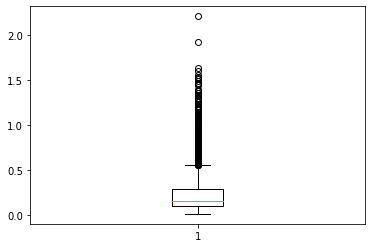

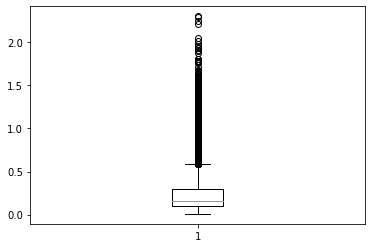

In [13]:
show_box_plot(3100)

In [15]:
first_saturday=df.columns.get_loc("2017-01-07 00:00:00")
first_saturday

289

In [32]:
first_week=("2017-01-01 00:00:00","2017-01-07 00:00:00")
second_week=("2017-01-08 00:00:00","2017-01-14 00:00:00")
third_week=("2017-01-15 00:00:00","2017-01-21 00:00:00")
forth_week=("2017-01-22 00:00:00","2017-01-28 00:00:00")

In [62]:
def genereate_consumption_per_month(df,n,first_week,second_week,third_week,forth_week):
    first_week_consumption=[]
    second_week_consumption=[]
    third_week_consumption=[]
    forth_week_consumption=[]
    
    first_week_start=df.columns.get_loc(first_week[0])
    first_week_end=df.columns.get_loc(first_week[1])
    
    second_week_start=df.columns.get_loc(second_week[0])
    second_week_end=df.columns.get_loc(second_week[1])
    
    third_week_start=df.columns.get_loc(third_week[0])
    third_week_end=df.columns.get_loc(third_week[1])
    
    forth_week_start=df.columns.get_loc(forth_week[0])
    forth_week_end=df.columns.get_loc(forth_week[1])
    
    for j in range (first_week_start,first_week_end):
        if(not math.isnan(df.iloc[n,j])):
            first_week_consumption.append(df.iloc[n,j])
    
    for j in range (second_week_start,second_week_end):
        if(not math.isnan(df.iloc[n,j])):
            second_week_consumption.append(df.iloc[n,j])
    
    for j in range (third_week_start,third_week_end):
        if(not math.isnan(df.iloc[n,j])):
            third_week_consumption.append(df.iloc[n,j])
    
    for j in range (forth_week_start,forth_week_end):
        if(not math.isnan(df.iloc[n,j])):
            forth_week_consumption.append(df.iloc[n,j])
    
    return (first_week_consumption,second_week_consumption,third_week_consumption,forth_week_consumption,forth_week_consumption)

In [63]:
(first_week_consumption,second_week_consumption,third_week_consumption,forth_week_consumption,forth_week_consumption)=genereate_consumption_per_month(df,3001,first_week,second_week,third_week,forth_week)

In [82]:
correlation_1=scipy.stats.pearsonr(first_week_consumption, forth_week_consumption)[0]
correlation_2=scipy.stats.pearsonr(second_week_consumption, forth_week_consumption)[0]
correlation_3=scipy.stats.pearsonr(third_week_consumption, forth_week_consumption)[0]


correlation between first week and last week= 0.22916439351387108
correlation between second week and last week= 0.4684482541899153
correlation between third week and last week= 0.49329772344901057


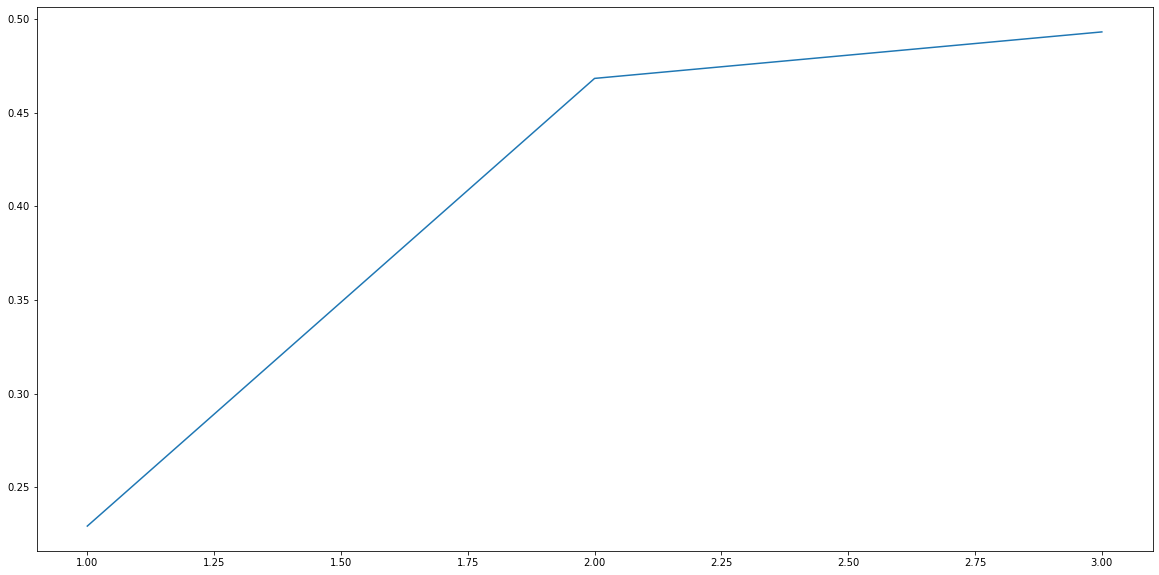

In [83]:
print("correlation between first week and last week= "+str(correlation_1))
print("correlation between second week and last week= "+str(correlation_2))
print("correlation between third week and last week= "+str(correlation_3))
plt.figure(figsize=(20,10))
plt.plot([1,2,3],[correlation_1,correlation_2,correlation_3])
plt.show()

the more we move away from the 4th week the correlation becomes low


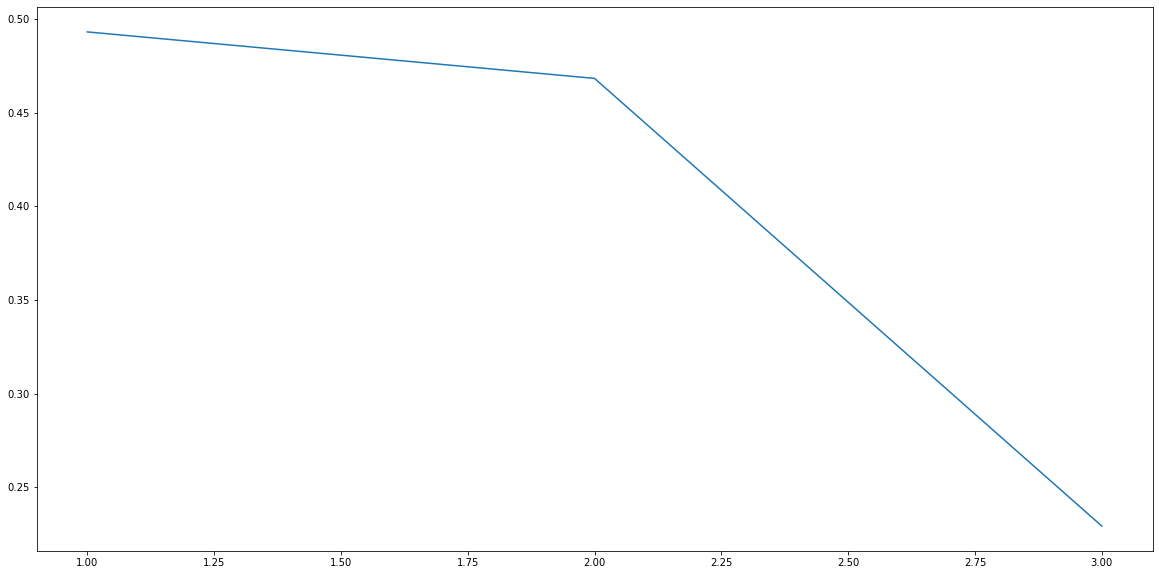

In [85]:
print("the more we move away from the 4th week the correlation becomes low")
plt.figure(figsize=(20,10))
plt.plot([1,2,3],[correlation_3,correlation_2,correlation_1])
plt.show()

consumption over the year of the smart meter number: 3001


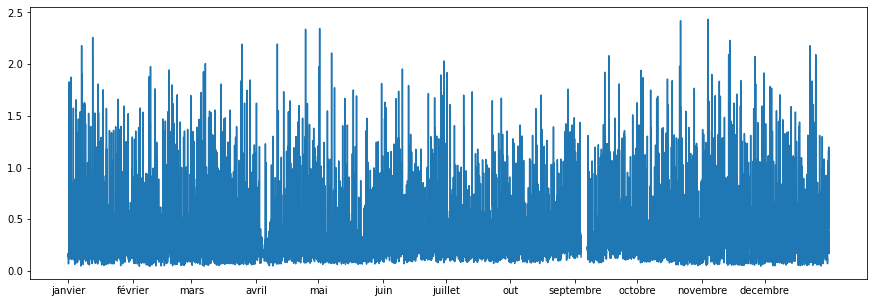

In [86]:
show_smart_meter_consumption_over_the_year(3001)

consumption over the year of the smart meter number: 200


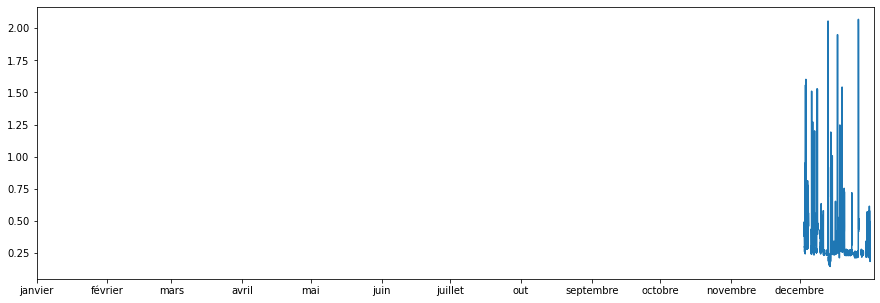

In [87]:
show_smart_meter_consumption_over_the_year(200)

consumption during a week of the smart meter number: 200


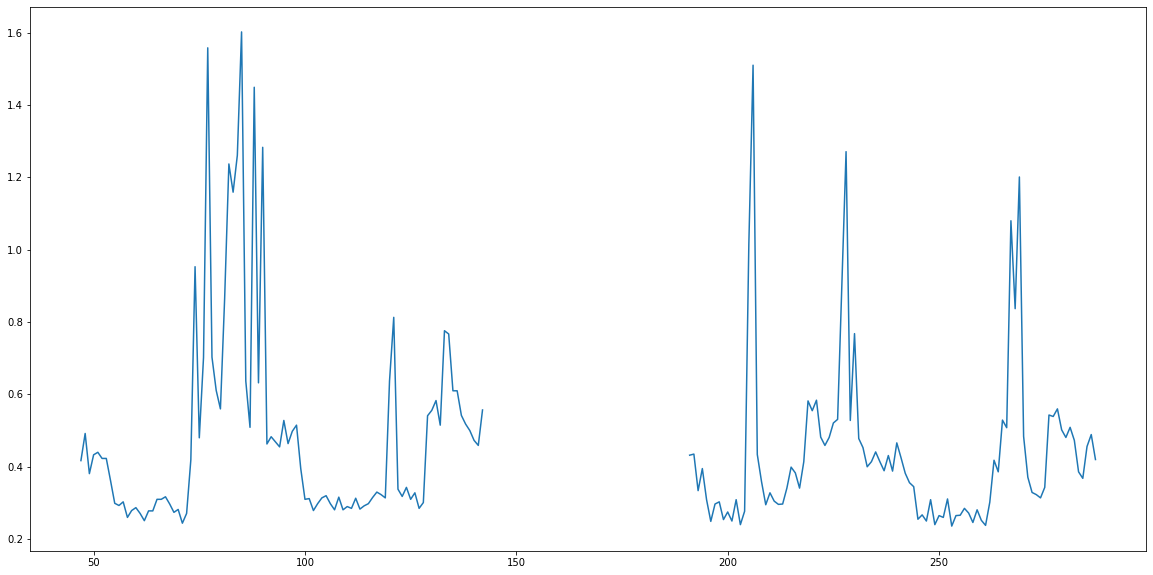

In [89]:
show_smart_meter_consumption_during_a_week('2017-12-01 23:30:00','2017-12-07 23:30:00',200)

consumption during a week of the smart meter number: 200


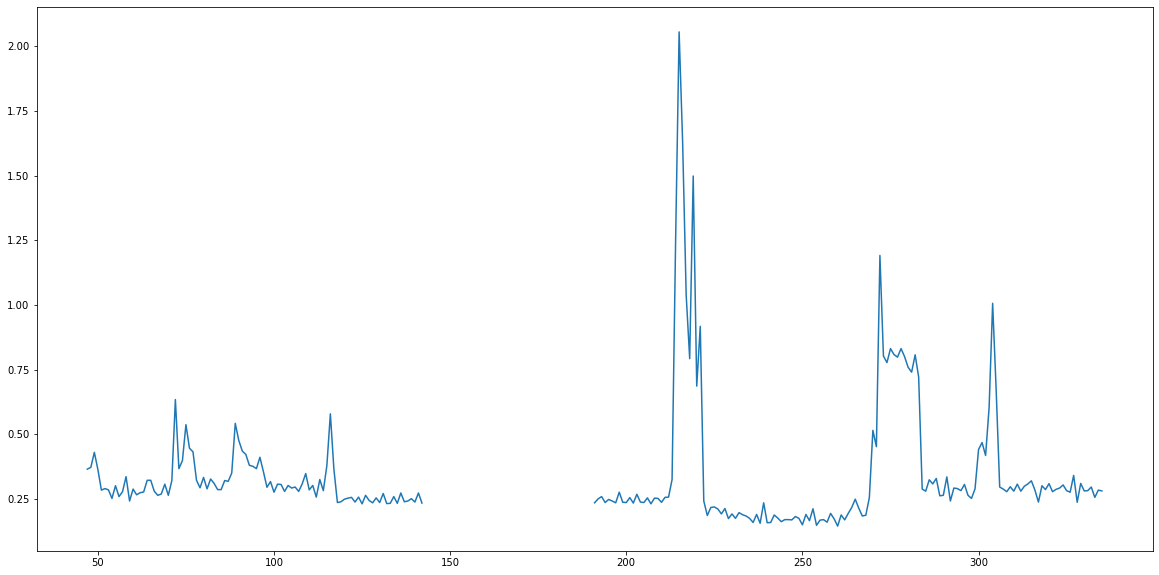

In [90]:
show_smart_meter_consumption_during_a_week('2017-12-08 23:30:00','2017-12-15 23:30:00',200)